# Haar Cascade Classifiers
---

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive images (images of faces) and negative images (images without faces). It is then used to detect objects in other images.

The algorithm can be explained in four stages:
- Calculating Haar Features
- Creating Integral Images
- Using Adaboost
- Implementing Cascading Classifiers

It’s important to remember that this algorithm requires a lot of positive images of faces and negative images of non-faces to train the classifier, similar to other machine learning models.

### Calculating Haar Features

The first step is to collect the Haar features. A Haar feature is essentially calculations that are performed on adjacent rectangular regions at a specific location in a detection window. The calculation involves summing the pixel intensities in each region and calculating the differences between the sums. Here are some examples of Haar features below.

![Haar features](images/haar_features.png)

### Creating Integral Images

Integral images essentially speed up the calculation of these Haar features. Instead of computing at every pixel, it instead creates sub-rectangles and creates array references for each of those sub-rectangles. These are then used to compute the Haar features.

![Haar integral](images/haar_integral_images.png)

It’s important to note that nearly all of the Haar features will be irrelevant when doing object detection, because the only features that are important are those of the object. 

For example, consider the image below. The top row shows two good features. The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose. But the same windows applied to cheeks or any other place is irrelevant.

![Haar irrelavant](images/haar_irrelevant_features.png)

However, how do we determine the best features that represent an object from the hundreds of thousands of Haar features? This is where Adaboost comes into play.

### Adaboost training

Adaboost essentially chooses the best features and trains the classifiers to use them. It uses a combination of “weak classifiers” to create a “strong classifier” that the algorithm can use to detect objects.
Weak learners are created by moving a window over the input image, and computing Haar features for each subsection of the image. This difference is compared to a learned threshold that separates non-objects from objects. Because these are “weak classifiers,” a large number of Haar features is needed for accuracy to form a strong classifier.

![Haar adaboost](images/haar_adaboost.jpeg)

The final classifier is a weighted sum of these weak classifiers. The paper says even 200 features provide detection with 95% accuracy. Their final setup had around 6000 features. (Imagine a reduction from 160000+ features to 6000 features. That is a big gain).


### Implementing Cascading Classifiers

OpenCV provides a training method (see Cascade Classifier Training) or pretrained models, that can be read using the cv::CascadeClassifier::load method. The pretrained models are located in the data folder in the OpenCV installation or can be found [here](https://github.com/opencv/opencv/tree/4.x/data).



In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import math

In [13]:
face_cascade = cv2.CascadeClassifier('haar_cascades/haarcascade_frontalface_default.xml')
# if not face_cascade.load('haar_cascades/haarcascade_frontalface_default.xml'):
#     print("Error loading cascade classifier")
# else:
#     print("Classifier loaded correctly")

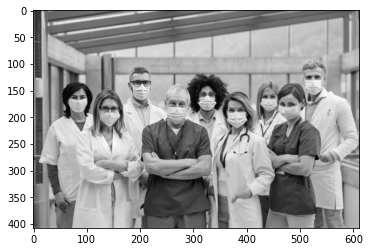

In [14]:
people = cv2.imread('images/people/people8.jpg')

people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)
people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)

plt.imshow(people_gray, cmap='gray')

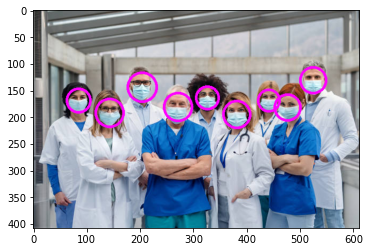

In [15]:
faces = face_cascade.detectMultiScale(people_gray)

for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    people_faces = cv2.ellipse(people, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

plt.imshow(people_faces)

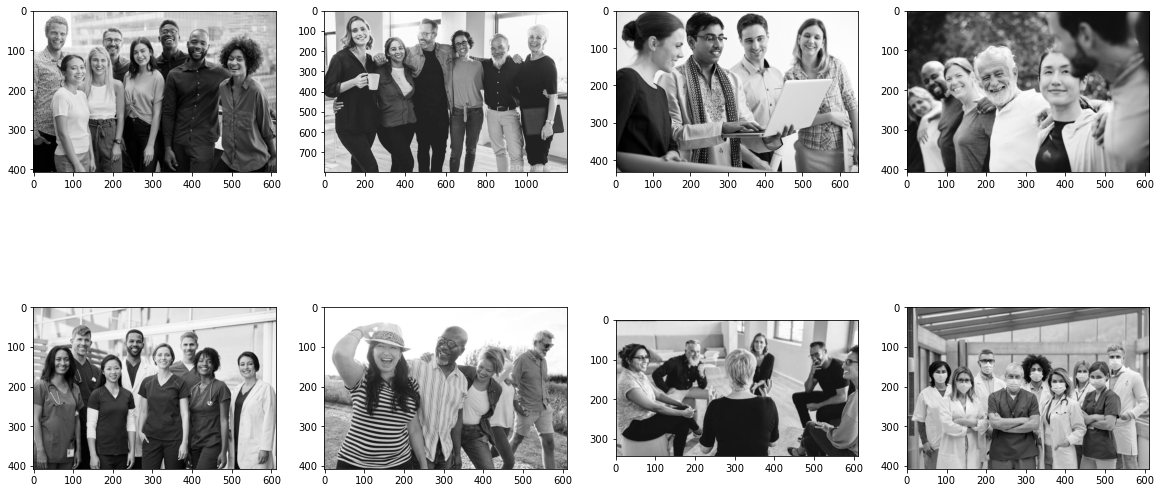

In [16]:
people_images = []
people_gray_images = []

f, ax = plt.subplots(2, 4, figsize=(20,10))

for i in range(8):

    people = cv2.imread(f'images/people/people{i+1}.jpg')

    people = cv2.cvtColor(people, cv2.COLOR_BGR2RGB)
    people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)

    people_images.append(people)
    people_gray_images.append(people_gray)

    col, row = i % 4, i // 4
    ax[row][col].imshow(people_gray_images[i], cmap='gray')



#### TO DO:

- Apply the classifier to the previous people images, and print ellipses over each face. 
- For each image, for each face found, apply a blur to the original image where the face is, and plot the image with the blurred faces.
- Download other classifiers from the opencv repository, and test it with the images.
- Apply all the preprocessing steps that you consider necessary so that the classifier improves. A useful algorithm is histogram equalization. Research how to implement it using opencv.